X_train.shape (1600, 7)
Y_train.shape (1600, 1)
X_test.shape (400, 7)
Y_test.shape (400, 1)
y_pred_example= [2]

y_pred=
 [1 2 1 1 3 2 1 2 4 3 1 3 1 2 4 4 3 4 1 3 2 1 2 2 2 4 1 1 2 4 1 3 4 4 1 3 2
 2 4 1 4 4 4 2 2 3 1 1 3 1 4 4 2 2 2 3 4 3 4 2 3 2 4 4 4 4 1 1 3 1 1 3 2 4
 2 2 2 4 3 1 1 3 3 4 3 2 4 1 1 1 4 2 2 2 3 3 3 1 3 3 4 1 2 3 2 3 2 1 1 1 4
 4 1 3 3 4 1 4 3 1 4 2 4 3 4 1 2 4 1 4 1 3 2 1 1 4 3 2 4 3 3 2 1 1 3 1 3 3
 1 4 4 4 3 2 4 4 4 3 3 3 2 4 3 2 1 2 4 4 3 4 2 3 4 1 2 1 1 4 3 2 4 1 1 3 2
 4 1 2 3 4 1 4 2 1 4 3 3 1 2 1 4 4 1 1 3 3 1 3 2 1 2 2 2 1 2 4 4 3 4 3 4 1
 2 1 1 3 1 3 2 1 1 1 1 4 2 1 2 2 2 1 2 1 1 2 3 3 3 4 1 3 1 4 1 1 1 2 4 1 2
 3 2 1 3 2 3 3 1 3 2 2 2 3 1 1 1 1 3 1 4 3 3 3 4 1 3 1 2 1 3 3 3 3 1 2 3 2
 4 2 1 2 4 1 4 1 2 1 2 3 1 3 3 2 1 3 2 3 1 1 3 3 4 3 4 2 4 3 3 2 4 2 4 4 2
 2 2 3 1 4 2 4 4 2 4 2 1 3 2 1 2 2 4 1 4 2 3 4 2 4 1 3 3 4 1 2 4 3 3 1 4 3
 2 1 4 3 2 3 2 4 1 1 1 2 3 4 2 2 1 4 4 4 1 4 4 4 1 3 1 2 2 4]

cm = [[107   0   0   0]
 [  0  93   1   0]
 [  1   4  96   0]
 [ 

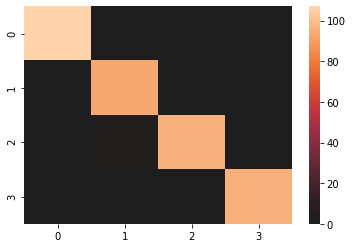

DecisionTreeClassifierModel Train Score is :  0.968125
DecisionTreeClassifierModel Test Score is :  0.98
DecisionTreeClassifierModel Classes are :  [1 2 3 4]


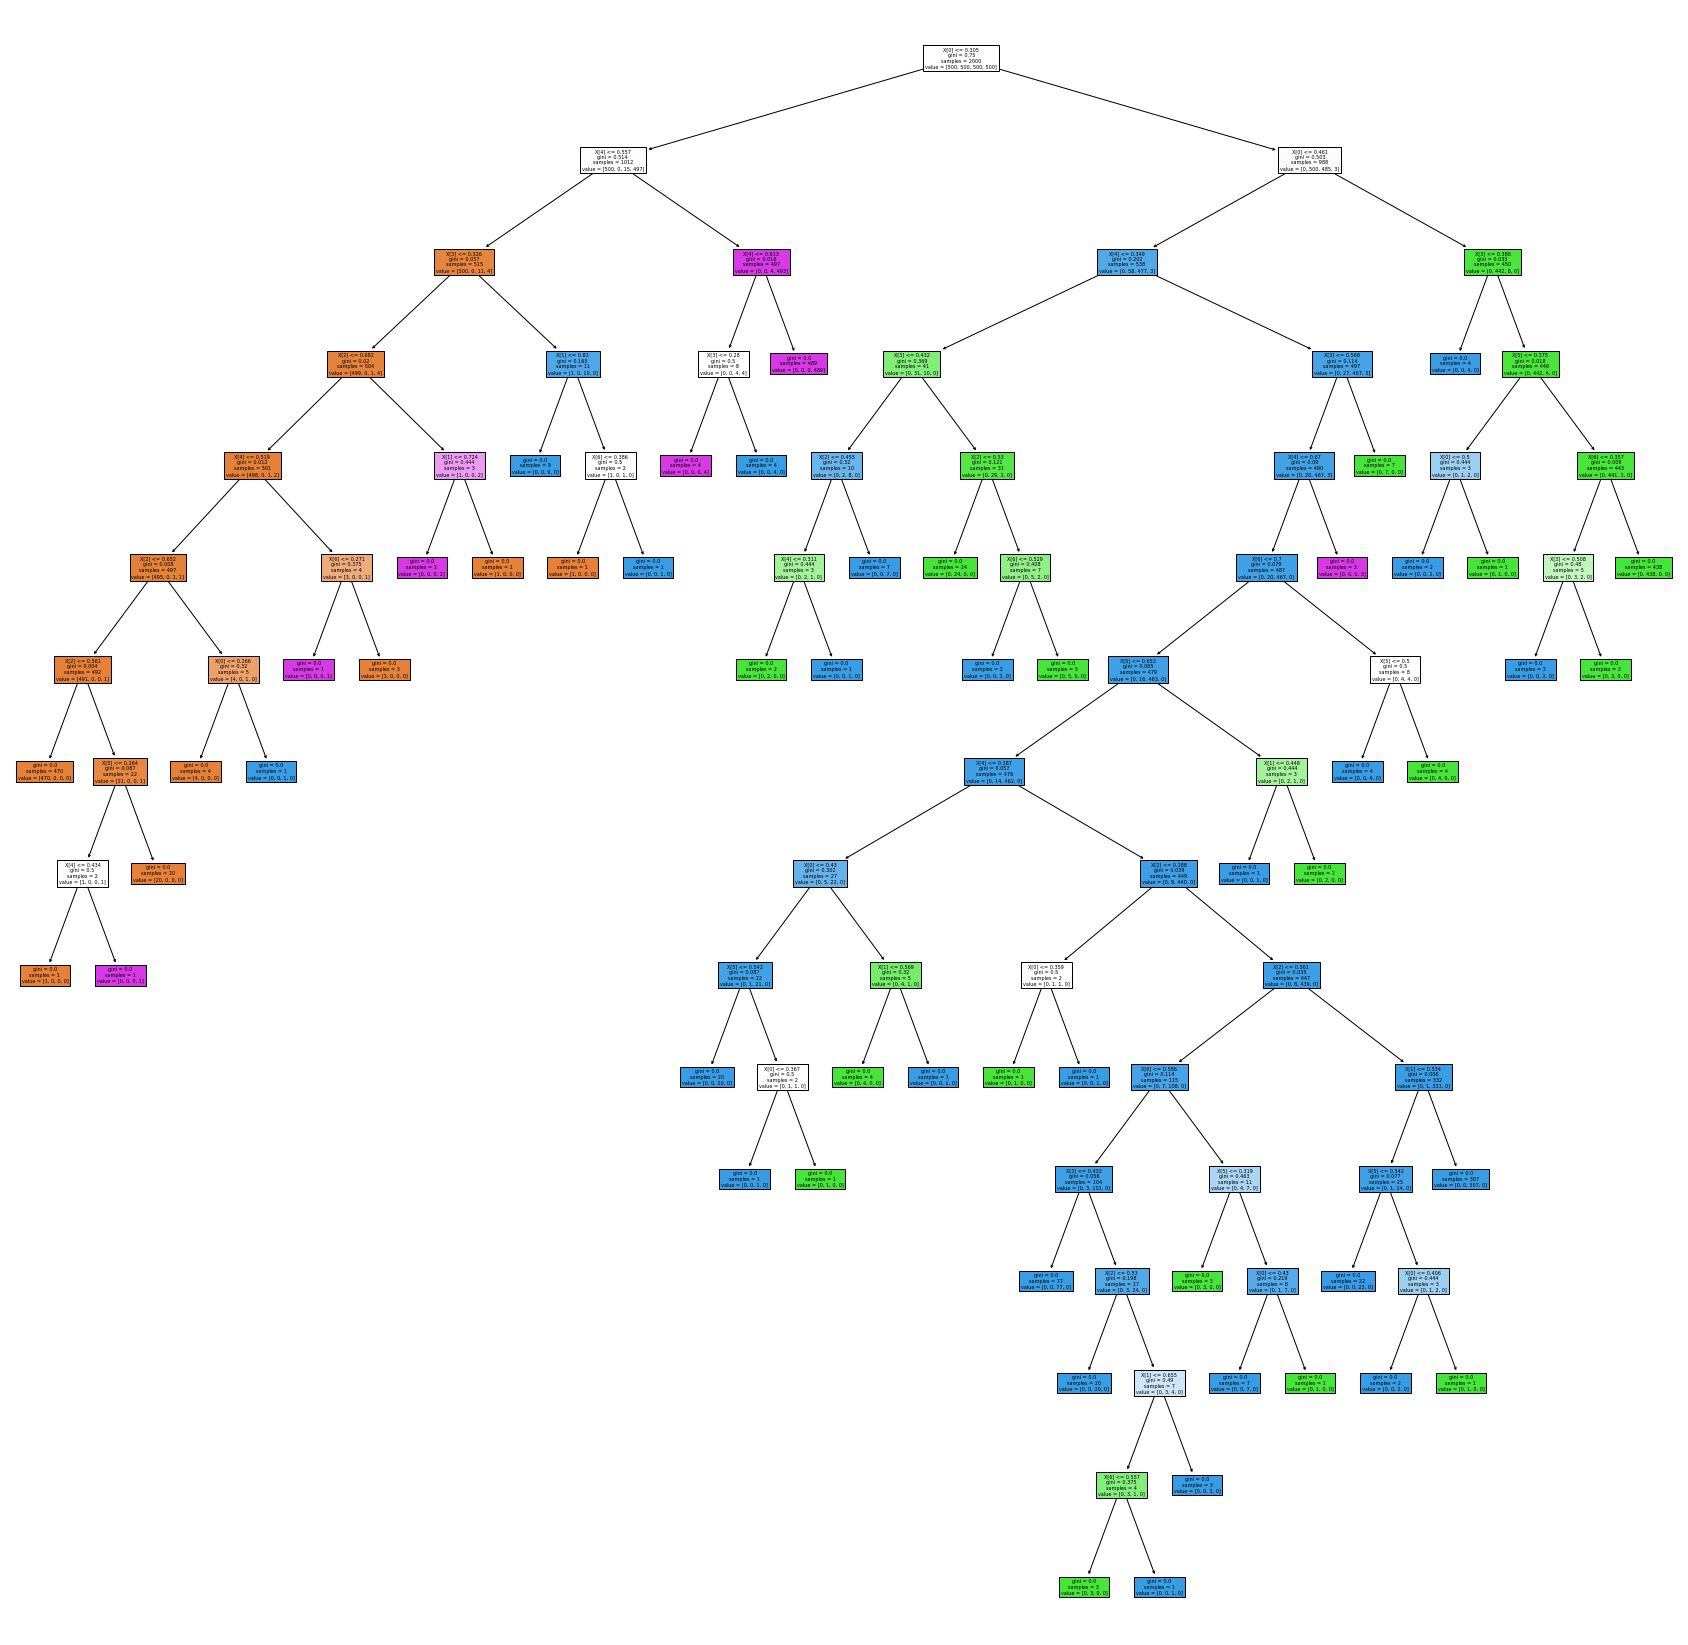

In [2]:
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
import sklearn.metrics
from sklearn import tree
from sklearn.model_selection import train_test_split
import seaborn as sns

columns = [
    'wifi_01',
    'wifi_02',
    'wifi_03',
    'wifi_04',
    'wifi_05',
    'wifi_06',
    'wifi_07',
    'room'
    ]

def redData(path):
    # read data
    data = pd.read_csv(path,usecols=columns)
    
    # convert data to numpy matrix
    cols = data.shape[1]
    xd = data.iloc[:,0:cols-1]
    yd = data.iloc[:,cols-1:cols] 
    x = np.matrix(xd.values)
    y = np.matrix(yd.values)
    
    return x,y,data

#Importing dataset
X,y,data = redData('../data/data_clean.csv')

X_train,  X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2)
print ("X_train.shape",X_train.shape)
print ("Y_train.shape",y_train.shape)
print ("X_test.shape",X_test.shape)
print ("Y_test.shape",y_test.shape)

#Fitting Decision Tree classifier to the Training set criterion parameter can be entropy or gini.
classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
classifier.fit(X_train, y_train)
classifier.score(X_test , y_test)

#predict just one exemple
y_pred_example = classifier.predict(np.array([1,1,1,1,1,1,1]).reshape(1,-1))
print("y_pred_example=",y_pred_example)

#predict 20% of our data 
y_pred = classifier.predict(X_test)
print("\ny_pred=\n",y_pred) 


#Making the Confusion Matrix 
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print("\ncm =",cm)

# it allows to display the Gain of each feature
print("\nclassifier.feature_importances_",classifier.feature_importances_)


sns.heatmap(cm, center=True)
plt.show()


#Applying DecisionTreeClassifier model

DecisionTreeClassifierModel = DecisionTreeClassifier(criterion='entropy',max_depth=3,random_state=33)
DecisionTreeClassifierModel.fit(X_train, y_train)

#Calculating Details
print('DecisionTreeClassifierModel Train Score is : ' , DecisionTreeClassifierModel.score(X_train, y_train))
print('DecisionTreeClassifierModel Test Score is : ' , DecisionTreeClassifierModel.score(X_test, y_test))
print('DecisionTreeClassifierModel Classes are : ' , DecisionTreeClassifierModel.classes_)

#  Fit the classifier with default hyper-parameters
clf = DecisionTreeClassifier(random_state=12345)
model = clf.fit(X, y)
text_representation = tree.export_text(clf)
#  print(text_representation)
with open("decistion_tree.log", "w") as fout:
    fout.write(text_representation)

# print image
fig = plt.figure(figsize=(30,30))
_ = tree.plot_tree(clf, filled=True)